In [155]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style='darkgrid')
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
print('ok :)')

ok :)


In [156]:
flight = pd.read_csv("./Datasets/flight price.csv")
flight = flight.drop('Unnamed: 0',axis=1)
flight.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


# Univariate Analysis

In [157]:
def create_bar(x,pal):
    series=flight.groupby(x)['flight'].count()
    series=series.sort_values(ascending=False)
    sns.barplot(series,width=0.6,palette=pal,hue=None)

**1. Bar Graph depicting the number of flights per airlines**

In [158]:
colr=sns.dark_palette('#e50914',reverse=False,n_colors=8)

In [159]:
colors=['#092b9c','#033aa8','#3170de','#3487e1','#2da0ed','#30aafc']

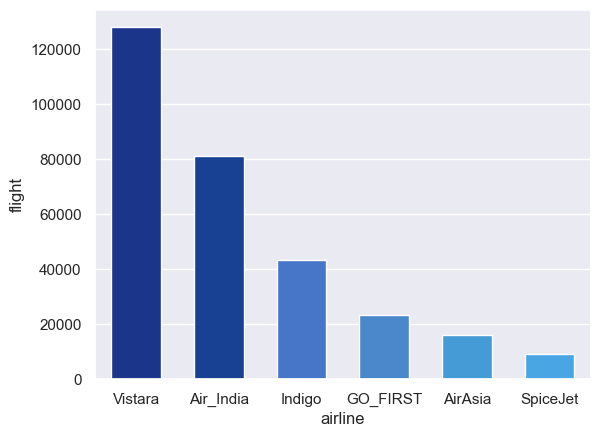

In [160]:
sns.set_theme(style='darkgrid')
create_bar('airline',colors)

**2. Bar graph depicting the number of flights per number of stops**

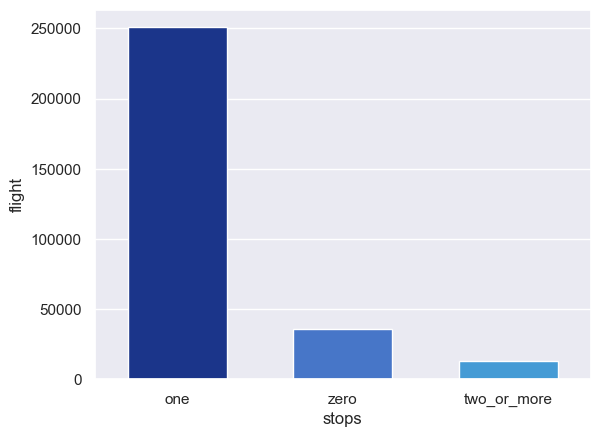

In [161]:
create_bar('stops',colors[::2])

**3. How many economy and buisness flights are there?**

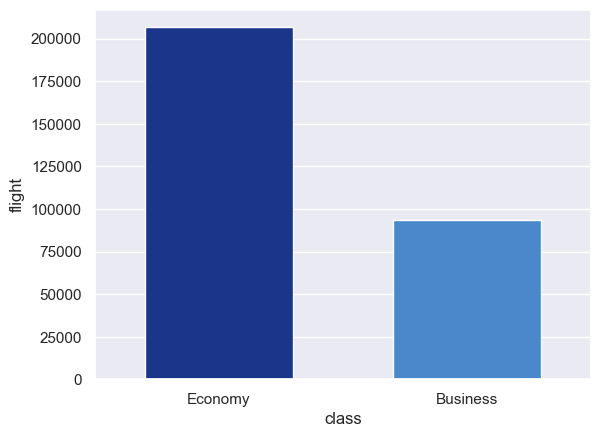

In [162]:
create_bar('class',colors[::3])

**Conclusion** : 1) Vistara is has the highest flights in this datset 
                 2) Dataset contains more economy class than buisness class 
                 3) Dataset has mostly one stops flights than non stops

# Answer to Questions for Analysis

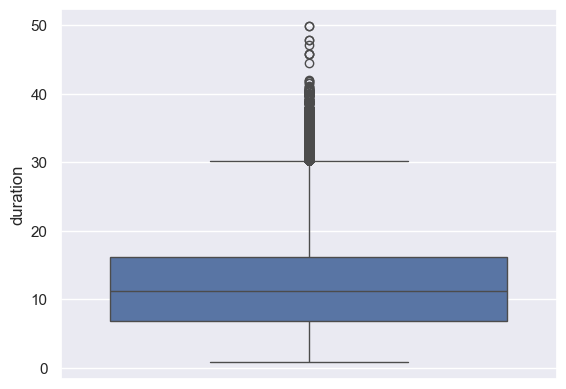

In [163]:
sns.boxplot(flight,y='duration')
dur_info=flight['duration'].describe() ## Duration info

48 hours flight seems anamoly in datasets. Hence we need  to clean it first.

### Removing Outliers

In [164]:


med= dur_info['50%'] #median
iqr = dur_info.loc['75%']-dur_info.loc['25%'] #inter quartile range
maximum = med + iqr # Maximum duration 
# print(maximum,min)
new_flight=flight[flight['duration']< maximum ]
new_flight['duration'].describe()


count    252551.000000
mean          9.834717
std           4.906779
min           0.830000
25%           6.170000
50%           9.830000
75%          13.580000
max          20.580000
Name: duration, dtype: float64

In [165]:
econ = new_flight[new_flight["class"]=='Economy']
buis = new_flight[new_flight["class"]=='Business']

Successfully Removed outliers 😊

### Q1. How price ranges betweeen different airlines?

In [166]:
econ.groupby('airline')['price'].median()

airline
AirAsia      3276.0
Air_India    5950.0
GO_FIRST     5336.0
Indigo       4453.0
SpiceJet     5388.0
Vistara      6450.0
Name: price, dtype: float64

In [167]:
buis.groupby('airline')['price'].median()

airline
Air_India    49613.0
Vistara      56702.0
Name: price, dtype: float64

Text(0.5, 0, 'Airlines')

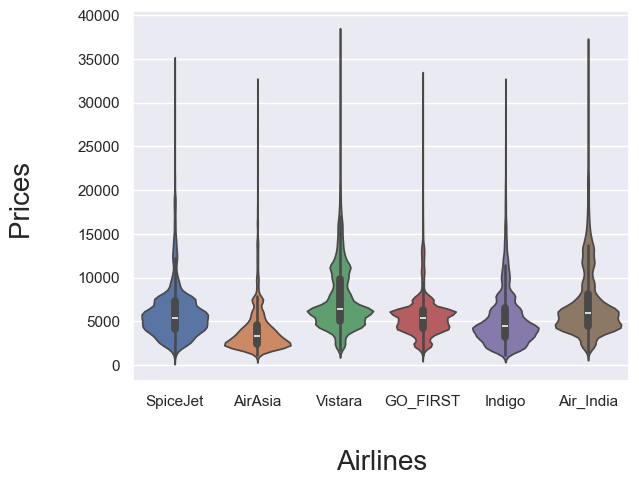

In [205]:
## For economy class
fig =sns.violinplot(econ,x='airline',y='price',hue='airline')
fig.set_ylabel('Prices ',fontsize=20,labelpad=30)
fig.set_xlabel('Airlines',fontsize=20,labelpad=30)


We see that **Air Asia** provides the cheapest flights. Meanwhile **Vistara** and **Air India** are the costliest.💵

Text(0.5, 0, 'Airlines')

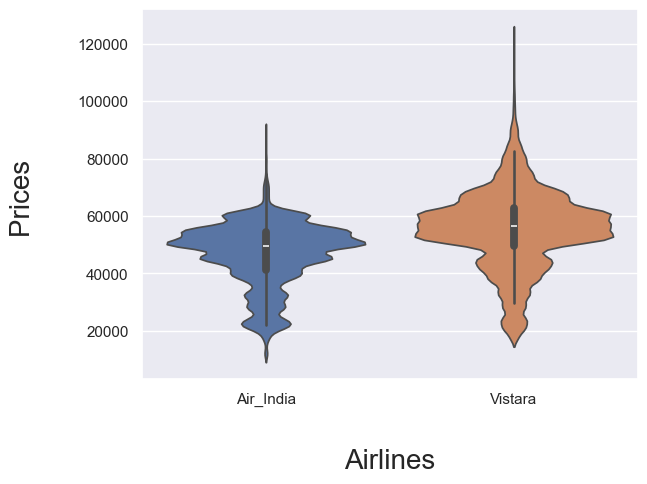

In [169]:
## Buisness Class
fig =sns.violinplot(buis,x='airline',y='price',hue='airline')
fig.set_ylabel('Prices ',fontsize=20,labelpad=30)
fig.set_xlabel('Airlines',fontsize=20,labelpad=30)


**Conclusion**: 1. Business class aare only availabale in Air India and Vistara
                2. Cheapest flights are of Air Asia  mostly ranging from 1k to 8k.
                3. Costliest are of Vistara

### Q2. What is the the average durations of flight of different airlines

In [170]:
new_flight.groupby('airline')['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
airline,,,,,,,,
AirAsia,16098.0,8.941714,4.173152,0.92,5.92,9.33,11.83,19.58
Air_India,58502.0,11.758885,5.071474,1.00,8.17,12.50,15.75,20.58
GO_FIRST,23167.0,8.752215,4.010831,1.00,6.00,8.83,11.75,19.33
Indigo,43120.0,5.795197,2.769322,0.83,2.92,6.00,7.75,15.42
SpiceJet,6700.0,8.276270,5.835820,1.00,2.67,6.42,13.50,20.25
Vistara,104964.0,10.897100,4.649528,1.00,7.58,11.25,14.25,20.58


Text(0.5, 0, 'Airlines')

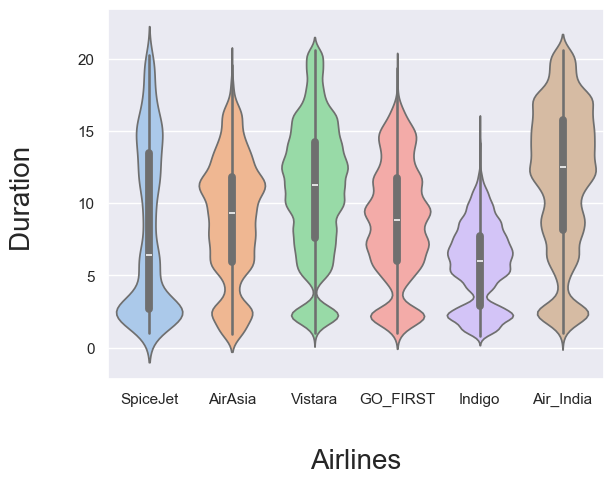

In [171]:
fig =sns.violinplot(new_flight,x='airline',y='duration',hue='airline',palette='pastel')
fig.set_ylabel('Duration ',fontsize=20,labelpad=30)
fig.set_xlabel('Airlines',fontsize=20,labelpad=30)


**Flights with maximum durations**


In [172]:
max_dur=new_flight['duration'].max()
new_flight[new_flight['duration']==max_dur].head(3)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
390,Air_India,AI-811,Delhi,Evening,one,Afternoon,Mumbai,Economy,20.58,3,24225
848,Air_India,AI-811,Delhi,Evening,one,Afternoon,Mumbai,Economy,20.58,6,11730
1030,Air_India,AI-811,Delhi,Evening,one,Afternoon,Mumbai,Economy,20.58,7,11310


**Flights with minimum duration** 

0.83 hour is taken by the shortest flight and its Indigo flight

In [173]:
min_dur=new_flight['duration'].min()
price=new_flight[new_flight['duration']==min_dur]['price'].median()
print("Median price for shortest duration",price)
new_flight[new_flight['duration']==min_dur].head(3)


Median price for shortest duration 1604.0


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
115869,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,6,3498
115943,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,7,3498
116010,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,8,3498


## I will be doing price analysis for economy class only. 

### Q3. How prices vary with departure and arrival time?

Median price for late night departures is least. Hence we can say late night departures are cheapest

In [174]:
econ.groupby('departure_time')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
departure_time,,,,,,,,
Afternoon,31352.0,6186.575561,3504.603144,1105.0,4009.0,5441.0,7352.00,34158.0
Early_Morning,42534.0,6452.349744,3675.187556,1105.0,4173.0,5678.0,7425.00,36911.0
Evening,35786.0,5938.475381,3407.163107,1105.0,3860.0,5152.0,7004.00,36333.0
Late_Night,1168.0,4784.699486,2388.789076,2050.0,3263.0,4439.0,5850.00,14526.0
Morning,41720.0,6963.947387,3956.947057,1105.0,4413.0,5989.0,8236.75,37646.0
Night,24395.0,5804.458414,3313.550972,1105.0,3754.0,5102.0,6578.00,33827.0


In [175]:
table=econ.pivot_table(index='arrival_time',columns='departure_time',values='price',aggfunc='median')
table =table[table.columns].apply(lambda x:x/1000)
table

departure_time,Afternoon,Early_Morning,Evening,Late_Night,Morning,Night
arrival_time,,,,,,
Afternoon,2.901,5.2955,6.133,6.489,4.585,6.075
Early_Morning,5.875,3.0000,5.323,3.393,6.538,4.477
Evening,4.968,6.3240,3.363,6.395,6.262,6.578
Late_Night,4.637,6.7230,4.213,4.498,5.656,3.834
Morning,6.082,4.1970,6.161,4.316,3.020,5.761
Night,5.790,6.1810,4.499,6.653,6.437,3.096


Plots 

Text(0, 0.5, 'Price')

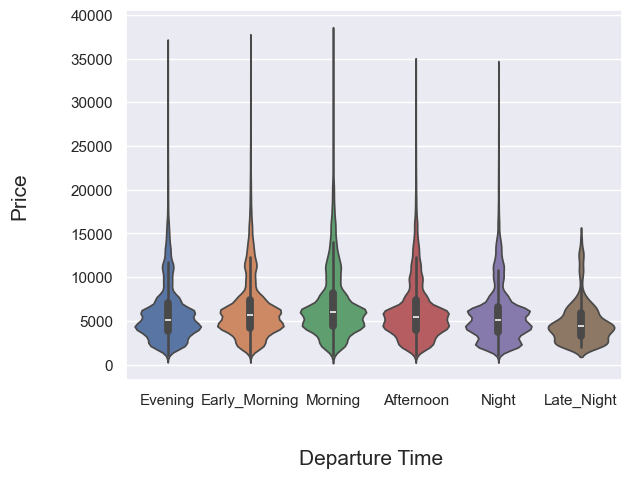

In [176]:
fig =sns.violinplot(econ,x='departure_time',y='price',hue='departure_time')
fig.set_xlabel('Departure Time ',fontsize=15,labelpad=30)
fig.set_ylabel('Price',fontsize=15,labelpad=30)


**Conclusion** : Late night flights are cheapest

Text(0.5, 19.909374999999997, 'Departure Time')

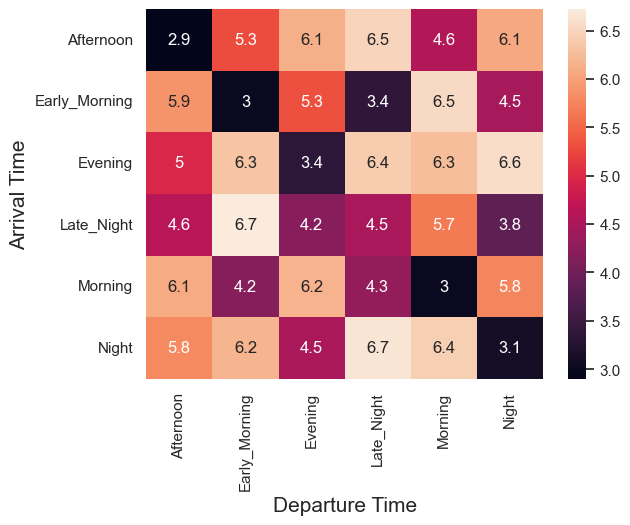

In [177]:
# Heatmap of departure and arrival time
fig=sns.heatmap(table,annot=True)
fig.set_ylabel("Arrival Time",fontsize=15)
fig.set_xlabel("Departure Time",fontsize=15)


### Q4. How price varies per route?

In [178]:
route =econ.pivot_table(index='source_city',columns='destination_city',values='price',aggfunc='median')
route=route.fillna(0)
route=route.apply(lambda x:x/1000)
route

destination_city,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
source_city,,,,,,
Bangalore,0.000,6.161,4.500,5.322,6.186,6.158
Chennai,6.089,0.000,4.971,4.356,5.937,4.672
Delhi,4.500,4.979,0.000,5.761,5.955,5.231
Hyderabad,5.441,4.453,5.823,0.000,5.706,4.453
Kolkata,6.488,6.290,6.353,6.488,0.000,6.067
Mumbai,6.082,4.601,5.343,4.262,5.949,0.000


Text(47.24999999999999, 0.5, 'Destination City')

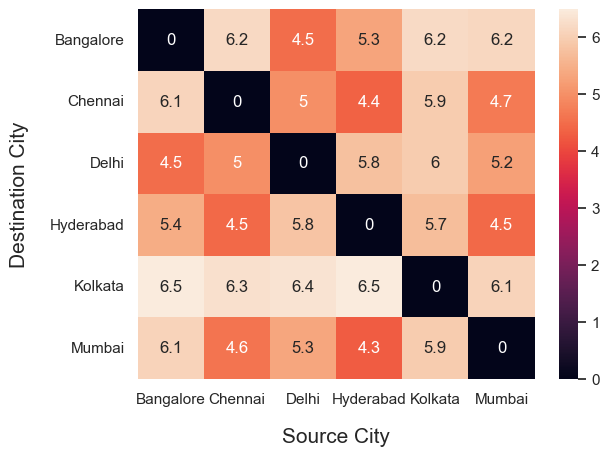

In [179]:

fig =sns.heatmap(route,annot= True)
fig.set_xlabel("Source City",fontsize=15,labelpad=15)
fig.set_ylabel("Destination City",fontsize=15,labelpad=15)


Cheapest flights are : Hyderabad-Mumbai
Expensive FLights are- While Hydrabad -Kolkata and Bangalore -Kolkata flights 

### How prices vary with number of stops?

In [180]:
econ.groupby('stops')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
stops,,,,,,,,
one,139718.0,6631.847135,3588.100600,1105.0,4348.0,5817.0,7584.0,37646.0
two_or_more,9335.0,8580.133690,4667.342905,1966.0,5942.0,7656.0,11089.5,35145.0
zero,27902.0,4012.624615,2106.398792,1105.0,2353.0,3531.0,4856.0,21058.0


In [181]:

econ['stops']=econ['stops'].map({'one':'1 Stop','zero':'Non-Stop','two_or_more':'2+ Stops'})


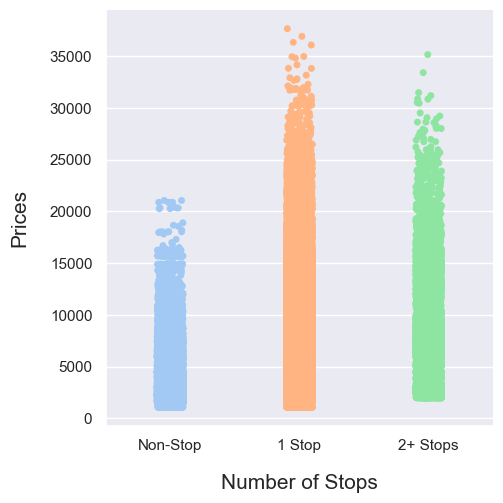

In [182]:

sns.set_theme(style='darkgrid')
fig=sns.catplot(econ,x='stops',y='price',hue='stops',palette='pastel')
fig.set_xlabels("Number of Stops",fontsize=15,labelpad=15)
fig.set_ylabels("Prices",fontsize=15,labelpad=15)

Non Stop flights are cheapest

### Q6. How prices vary with Days left ot book the ticket?

First lets plot the distribution of days_left

In [183]:
sns.set_theme(style='darkgrid')

<Axes: xlabel='days_left', ylabel='Density'>

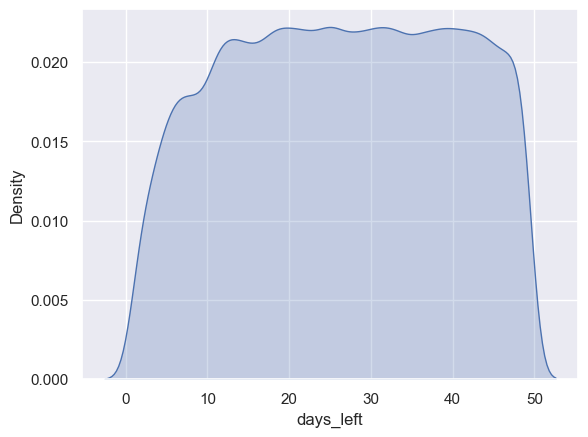

In [184]:
sns.kdeplot(econ,x='days_left',fill=True)

We find a lot of people buy prior 5 days, so that they get cheaper price

In [185]:
days_series= econ.pivot_table(index='days_left',values='price',aggfunc='median')
days_series=days_series.sort_values(by='days_left',ascending=True)

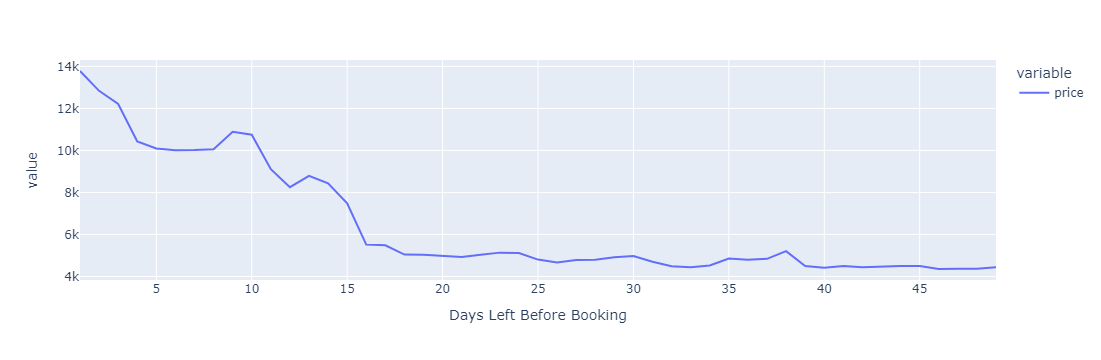

In [186]:
fig=px.line(days_series,labels={'values':"Prices",'days_left':"Days Left Before Booking"})
fig.show()

In [187]:
days_series2= econ.pivot_table(index='days_left',columns='airline',values='price',aggfunc='median')
days_series2=days_series2.sort_values(by='days_left',ascending=True)

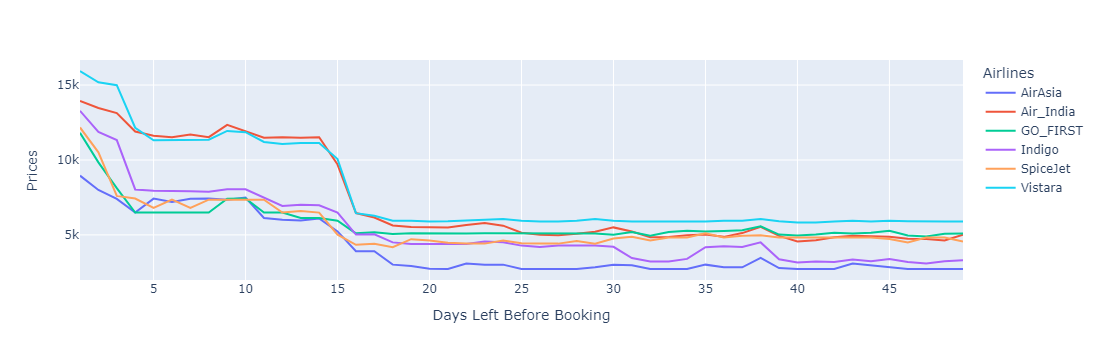

In [188]:
fig=px.line(days_series2,labels={'value':"Prices",'days_left':"Days Left Before Booking",'airline':'Airlines'})
fig.show()

This graph is see a general trend for all airlines , within 15 days prices soar up drastically. Flight tickets that are booked with 1,2 days are all above 8ks, with air asia providing the minimum. Meanwhile, Vistara the maximum.

### Q6.(b) How price vary with duration?

In [189]:
series=econ.groupby('duration')['price'].median()
series= pd.DataFrame(series)
series

,price
duration,
0.83,1604.0
0.92,1548.0
1.00,1715.0
1.08,1776.0
1.17,1714.0
...,...
20.25,6320.0
20.33,7081.0
20.42,5688.0


In [190]:
econ.groupby('duration')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
duration,,,,,,,,
0.83,52.0,1973.557692,727.375794,1443.0,1443.00,1604.0,1924.00,3498.0
0.92,78.0,2003.538462,1142.985652,1443.0,1443.00,1548.0,1776.00,9557.0
1.00,375.0,2213.786667,1041.578701,1105.0,1604.00,1715.0,1924.00,8327.0
1.08,551.0,2554.738657,1438.745415,1443.0,1654.00,1776.0,3497.00,12118.0
1.17,945.0,2464.453968,1477.969668,1105.0,1603.00,1714.0,3363.00,11867.0
...,...,...,...,...,...,...,...,...
20.25,205.0,7277.029268,2971.631726,3584.0,5330.00,6320.0,9349.00,16996.0
20.33,299.0,8038.474916,3641.894389,4149.0,5232.00,7081.0,9828.00,35145.0
20.42,260.0,7579.038462,4694.791788,3685.0,4544.00,5688.0,10015.25,30525.0


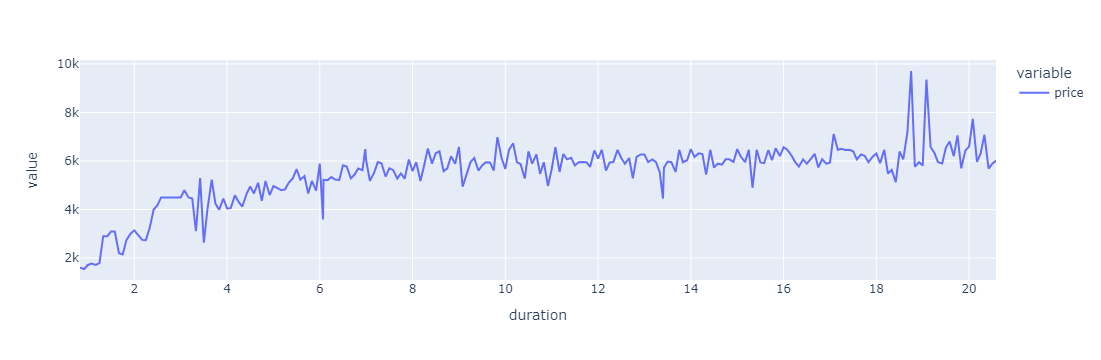

In [191]:
px.line(series)

The general trend is price increases with increase in duration. But there are lots of ups and down in the graph. Hence they prices and flight duration doesn't seem to have strong correlation. Another reason could be escessive records for 1 stop flights.

<Axes: xlabel='duration', ylabel='price'>

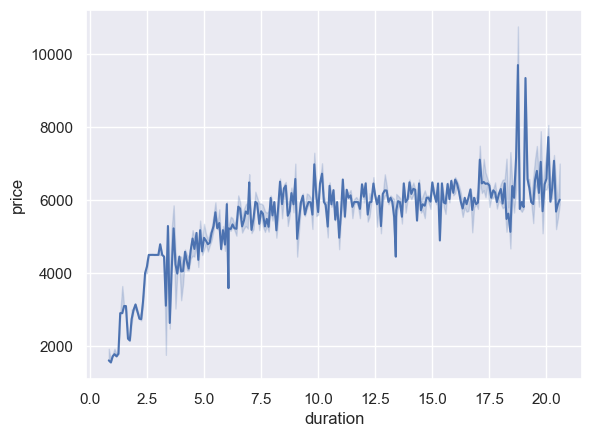

In [192]:
sns.lineplot(econ,x='duration',y='price',estimator='median',sort=True)

### Q7. Stops comparion with days left

In [193]:
stops_series=econ.pivot_table(index='days_left',columns='stops',aggfunc='count')['airline']

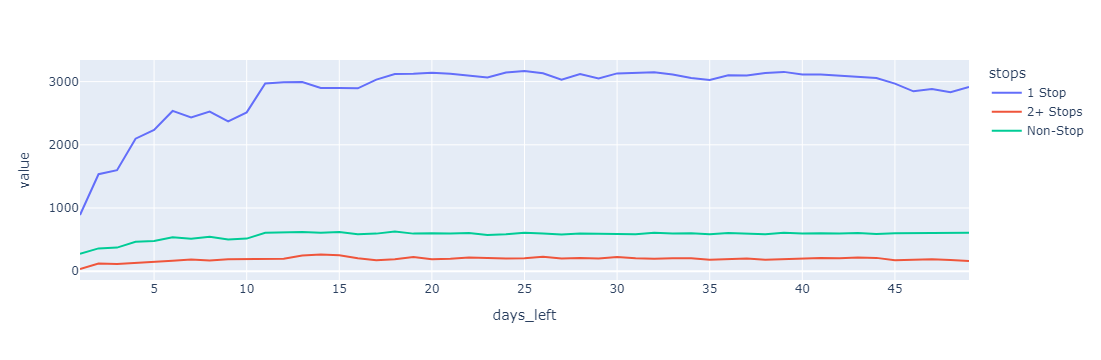

In [194]:
px.line(stops_series)

Prices decrease with the increase in days left for booking. Hence we can say tickets booked before 10 to 15 days are much cheaper.

# Finding the Correlations and Feature Engineering

In [195]:
econ.head()
econ=econ.drop(columns='flight',axis=1)


In [196]:
econ=econ.drop('class',axis=1)


In [197]:

econ['route']=econ['source_city']+" -> "+econ['destination_city']
econ['stops'].unique()

array(['Non-Stop', '1 Stop', '2+ Stops'], dtype=object)

In [198]:
econ['stops']=econ['stops'].map({'Non-Stop':0,'1 Stop':1,'2+ Stops':2})


In [199]:
econ.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left,price,route
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,2.17,1,5953,Delhi -> Mumbai
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,2.33,1,5953,Delhi -> Mumbai
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,2.17,1,5956,Delhi -> Mumbai
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,2.25,1,5955,Delhi -> Mumbai
4,Vistara,Delhi,Morning,0,Morning,Mumbai,2.33,1,5955,Delhi -> Mumbai


In [200]:
df= pd.read_csv('./Datasets/featured ds.csv')
df.head()
df= df.drop('Unnamed: 0',axis=1)

In [201]:
corr_table=df.corr()
new_corr= corr_table.drop(['source_city','destination_city','departure_time','arrival_time'],axis=1)
new_corr=new_corr.drop(['source_city','destination_city','departure_time','arrival_time'],axis=0)
new_corr

,airline,stops,duration,days_left,price,route
airline,1.000000,0.001213,0.012182,-0.027270,0.192885,-0.018136
stops,0.001213,1.000000,0.581613,0.003556,0.297839,0.002719
duration,0.012182,0.581613,1.000000,-0.013157,0.271847,0.020035
days_left,-0.027270,0.003556,-0.013157,1.000000,-0.546759,-0.004452
price,0.192885,0.297839,0.271847,-0.546759,1.000000,0.024143
route,-0.018136,0.002719,0.020035,-0.004452,0.024143,1.000000


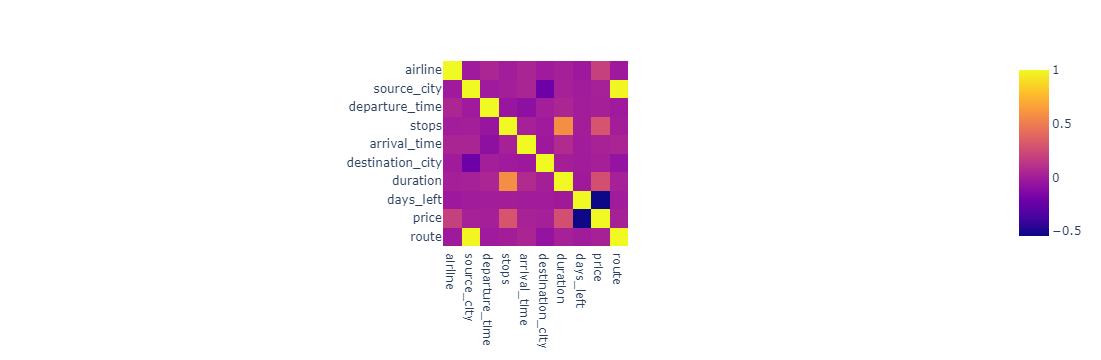

In [202]:
px.imshow(corr_table)


<Axes: >

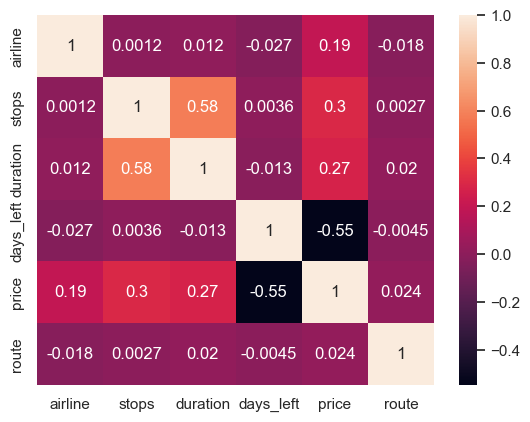

In [203]:
sns.heatmap(new_corr,annot=True)